In [1]:
!pip3 install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import prince

file = '/content/drive/MyDrive/Data_examples/contingency_matrix.xlsx'

df = pd.read_excel(file)

sum = df.drop(columns = ['TOPIC']).sum(axis = 0)
cols = [x for x in sum.keys() if sum[x]>50]
df_n = df.set_index('TOPIC')
df_n = df_n[cols]
sum_2 = df_n.sum(axis = 1)
idx = [x for x in sum_2.keys() if sum_2[x]>30]
df_n = df_n.loc[idx]
df1 = df_n.copy()
columns = df1.columns.tolist()



In [4]:
df1

,Negative,Neutral,Positive
TOPIC,,,
0,171,348,211
1,293,121,194
2,234,319,259
3,333,129,378
4,421,80,365
5,484,127,215
6,179,165,329
7,469,142,422
8,387,134,375


In [5]:
ca = prince.CA(n_components=3, n_iter=10,copy=True, check_input=True, engine='auto', random_state=13)

ca = ca.fit(df1)

#CA Information 
print(ca.eigenvalues_)
print(ca.total_inertia_)
print(ca.explained_inertia_)

#Coordinates for mapping (to provide if the team wants to do the mapping with another tool)
tabrow = ca.row_coordinates(df1)
tabrow["DATA"] = "Topics"
tabcol = ca.column_coordinates(df1)
tabcol["DATA"] = "Sentiment"

coord = pd.concat([tabrow,tabcol])

#%%

coord.to_excel('Coordinates_topics_x_sentiments.xlsx')

[0.09201369896455497, 0.05589413681001283, 7.686472654774548e-33]
0.14790783577456781
[0.6221015842919687, 0.3778984157080312, 5.196798813613773e-32]


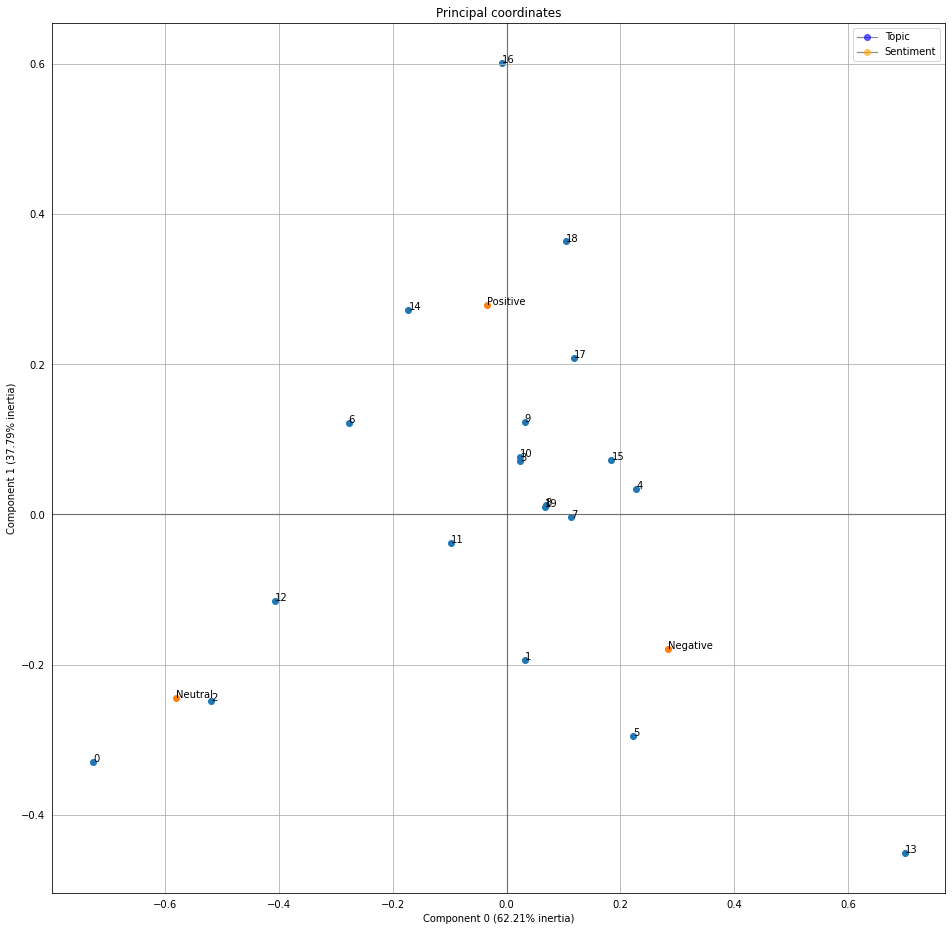

In [6]:

#Plot the data
ax = ca.plot_coordinates(X=df1, ax=None, figsize=(16, 16),x_component=0, y_component=1,
                         show_row_labels=True, show_col_labels=True)
ax.legend(['Topic','Sentiment'])
leg = ax.get_legend()
ax.get_legend().legendHandles[1]._legmarker.set_marker("o")
ax.get_legend().legendHandles[0]._legmarker.set_marker("o")
ax.get_legend().legendHandles[0]._legmarker.set_color('blue')
ax.get_legend().legendHandles[1]._legmarker.set_color('orange')
ax.get_figure()
ax.get_figure().savefig('Sentiment_0-1.svg')